In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['science', 'no-latex'])

from pathlib import Path

p = Path(".")
files = list(p.resolve().rglob("0*.jsonl"))
print(files)
df = pd.concat([pd.read_json(f, orient="records", lines=True) for f in files], ignore_index=True)

from sklearn.metrics import accuracy_score, f1_score

df["accuracy"] = df.apply(
    lambda row: accuracy_score(row["y_true"], row["y_pred"]), axis=1
)
df["macroF1"] = df.apply(
    lambda row: f1_score(row["y_true"], row["y_pred"], average="macro"), axis=1
)

def assign_model(row):
    try:
        return row["train_config"]["model_name_or_path"]
    except:
        return "/".join(row["model_name_or_path"].split("/")[-2].split("_")[0:2])

df["model"] = df.apply(assign_model, axis=1)

df[df.output_column=="Party_status"]

[PosixPath('/home/rupnik/macocu_backup/task11/011_results.jsonl'), PosixPath('/home/rupnik/macocu_backup/task11/010_results.jsonl'), PosixPath('/home/rupnik/macocu_backup/task11/012_results.jsonl'), PosixPath('/home/rupnik/macocu_backup/task11/018_results.jsonl'), PosixPath('/home/rupnik/macocu_backup/task11/013_results_english.jsonl'), PosixPath('/home/rupnik/macocu_backup/task11/013_results_slavic_asr.jsonl'), PosixPath('/home/rupnik/macocu_backup/task11/008_results.jsonl'), PosixPath('/home/rupnik/macocu_backup/task11/012_results_nonslavic.jsonl')]


,output_column,model_name_or_path,eval_file,clip_seconds,y_true,y_pred,train_config,accuracy,macroF1,model
18,Party_status,/home/peterr/macocu/task11/models/facebook_wav...,012_dev.csv,-1,"[Coalition, Coalition, Coalition, Opposition, ...","[Opposition, Opposition, Coalition, Opposition...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.613333,0.597222,facebook/wav2vec2-large-slavic-voxpopuli-v2
19,Party_status,/home/peterr/macocu/task11/models/facebook_wav...,012_test.csv,-1,"[Coalition, Coalition, Coalition, Coalition, O...","[Opposition, Coalition, Opposition, Coalition,...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.590000,0.587285,facebook/wav2vec2-large-slavic-voxpopuli-v2
56,Party_status,/home/peterr/macocu/task11/models/facebook_wav...,012_dev.csv,-1,"[Coalition, Coalition, Coalition, Opposition, ...","[Opposition, Opposition, Coalition, Opposition...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.606667,0.570247,facebook/wav2vec2-large-960h-lv60-self
57,Party_status,/home/peterr/macocu/task11/models/facebook_wav...,012_test.csv,-1,"[Coalition, Coalition, Coalition, Coalition, O...","[Opposition, Opposition, Opposition, Coalition...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.548889,0.531373,facebook/wav2vec2-large-960h-lv60-self
58,Party_status,/home/peterr/macocu/task11/models/facebook_wav...,012_dev.csv,-1,"[Coalition, Coalition, Coalition, Opposition, ...","[Opposition, Opposition, Coalition, Opposition...",{'model_name_or_path': 'facebook/wav2vec2-larg...,0.606667,0.570247,facebook/wav2vec2-large-960h-lv60-self
59,Party_status,/home/peterr/macocu/task11/models/facebook_wav...,012_dev.csv,-1,"[Coalition, Coalition, Coalition, Opposition, ...","[Opposition, Opposition, Coalition, Opposition...",{'model_name_or_path': 'classla/wav2vec2-large...,0.613333,0.597222,classla/wav2vec2-large-slavic-parlaspeech-hr
60,Party_status,/home/peterr/macocu/task11/models/facebook_wav...,012_test.csv,-1,"[Coalition, Coalition, Coalition, Coalition, O...","[Opposition, Coalition, Opposition, Coalition,...",{'model_name_or_path': 'classla/wav2vec2-large...,0.590000,0.587285,classla/wav2vec2-large-slavic-parlaspeech-hr
61,Party_status,/home/peterr/macocu/task11/models/facebook_wav...,012_dev.csv,-1,"[Coalition, Coalition, Coalition, Opposition, ...","[Opposition, Opposition, Coalition, Opposition...",{'model_name_or_path': 'classla/wav2vec2-large...,0.613333,0.597222,classla/wav2vec2-large-slavic-parlaspeech-hr
117,Party_status,models/classla_wav2vec2-large-slavic-parlaspee...,012_dev.csv,-1,"[Coalition, Coalition, Coalition, Opposition, ...","[Opposition, Opposition, Coalition, Opposition...",NaN,0.566667,0.559601,classla/wav2vec2-large-slavic-parlaspeech-hr
118,Party_status,models/classla_wav2vec2-large-slavic-parlaspee...,012_test.csv,-1,"[Coalition, Coalition, Coalition, Coalition, O...","[Opposition, Coalition, Opposition, Coalition,...",NaN,0.626667,0.625928,classla/wav2vec2-large-slavic-parlaspeech-hr


In [2]:
row = df.loc[94, :]
row

output_column                                              Speaker_name
model_name_or_path    /home/peterr/macocu/task11/models/classla_wav2...
eval_file                          003_speaker_id_test_for_datasets.csv
clip_seconds                                                         -1
y_true                [Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...
y_pred                [Đujić, Saša, Đujić, Saša, Đujić, Saša, Đujić,...
train_config          {'model_name_or_path': 'classla/wav2vec2-large...
accuracy                                                            1.0
macroF1                                                             1.0
model                      classla/wav2vec2-large-slavic-parlaspeech-hr
Name: 94, dtype: object

In [3]:
row["model"]

'classla/wav2vec2-large-slavic-parlaspeech-hr'

In [4]:
y_true = row["y_true"]
y_pred = row["y_pred"]

In [5]:
test = pd.read_csv("012_test.csv")
df = pd.read_json("ParlaSpeech-HR.v1.0.jsonl", orient="records", lines=True)
df["audio_length"] = df.end-df.start
df = df[df.audio_length >= 8]
df = pd.concat([df, df.speaker_info.apply(pd.Series)], axis=1)

In [6]:
test.head(2)

def generate_original_filename(s):
    p = Path(s)
    basename = p.parts[-1]
    return basename.replace("seg.", "")

test["key"] = test.path.apply(generate_original_filename)
test.head(2)

,path,Party_status,key
0,data_party_status/seg.DAK6_2rs1Fg_7989.53-8009...,Coalition,DAK6_2rs1Fg_7989.53-8009.51.wav
1,data_party_status/seg.bFuM6vBlCQE_8486.2-8497....,Coalition,bFuM6vBlCQE_8486.2-8497.29.wav


In [7]:
merged = pd.merge(test, df, left_on="key", right_on="path", how="left")

In [18]:
df.head(2)

,path,orig_file,start,end,words,word_start_times,norm_words,norm_words_start_times,utterance_id_start,utterance_id_end,...,norm_words_edited,audio_length,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth
0,rFVDr4ghXlQ_10620.07-10632.05.wav,"20 2 2020 - 1. dio, 16. sjednica, 9. saziv [rF...",10620.07,10632.05,"[interpretacija,, inzistiranje, na, tim, dezin...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...","[interpretacija, inzistiranje, na, tim, dezinf...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...",ParlaMint-HR_S16.u4568,ParlaMint-HR_S16.u4568,...,NaN,11.98,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Tuđman, Miroslav",M,1946
1,Ki_SnDM_EkQ_2917.58-2937.5.wav,"18 10 2018 - 9. sjednica, 9. saziv [Ki_SnDM_Ek...",2917.58,2937.50,"[izraelska, tvrtka, prodaje, avione, Hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...","[izraelska, tvrtka, prodaje, avione, hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...",ParlaMint-HR_S09.u4267,ParlaMint-HR_S09.u4267,...,NaN,19.92,Regular,MP,"Živi zid, SNAGA",Klub Živog zida i SNAGA-e,Opposition,"Bunjac, Branimir",M,1972


In [8]:
len(y_true)

500

In [9]:
merged.shape

(900, 25)

In [10]:
merged

,path_x,Party_status_x,key,path_y,orig_file,start,end,words,word_start_times,norm_words,...,norm_words_edited,audio_length,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status_y,Speaker_name,Speaker_gender,Speaker_birth
0,data_party_status/seg.DAK6_2rs1Fg_7989.53-8009...,Coalition,DAK6_2rs1Fg_7989.53-8009.51.wav,DAK6_2rs1Fg_7989.53-8009.51.wav,"7 3 2018 - 2. dio, 7. sjednica, 9. saziv [DAK6...",7989.53,8009.51,"[informacijama, jer, to, je, opasno, a, i, kaž...","[0, 1.15, 1.31, 1.45, 1.52, 1.94, 2.03, 2.08, ...","[informacijama, jer, to, je, opasno, a, i, kaž...",...,NaN,19.98,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Ivan Milošević, Domagoj",M,1970
1,data_party_status/seg.bFuM6vBlCQE_8486.2-8497....,Coalition,bFuM6vBlCQE_8486.2-8497.29.wav,bFuM6vBlCQE_8486.2-8497.29.wav,"15 2 2018 - 7. sjednica, 9. saziv [bFuM6vBlCQE...",8486.20,8497.29,"[digitalne, tehnologije, mijenjaju, način, živ...","[0, 0.53, 1.1400000000000001, 1.53, 1.92, 2.38...","[digitalne, tehnologije, mijenjaju, način, živ...",...,NaN,11.09,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Šipić, Ivan",M,1974
2,data_party_status/seg.MzGBkhrNCLo_2445.01-2465...,Coalition,MzGBkhrNCLo_2445.01-2465.0.wav,MzGBkhrNCLo_2445.01-2465.0.wav,"25 10 2019 - 14. sjednica, 9. saziv [MzGBkhrNC...",2445.01,2465.00,"[Što, se, tiče, priprema, za, provedbu, parlam...","[0, 0.26, 0.37, 0.61, 1.03, 1.15, 1.53, 2.13, ...","[što, se, tiče, priprema, za, provedbu, parlam...",...,NaN,19.99,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Ivan Milošević, Domagoj",M,1970
3,data_party_status/seg.xSErR_WVD4g_16276.59-162...,Coalition,xSErR_WVD4g_16276.59-16295.96.wav,xSErR_WVD4g_16276.59-16295.96.wav,"16 2 2017 - 3. sjednica, 9. saziv [xSErR_WVD4g...",16276.59,16295.96,"[one, koji, su, ugroženi., Vjerujem, da, će, c...","[0, 0.73, 0.9400000000000001, 1.1, 2.280000000...","[one, koji, su, ugroženi, vjerujem, da, će, ce...",...,NaN,19.37,Regular,MP,BM 365 i NZ,Klub Stranke rada i solidarnosti i nezavisnih ...,Coalition,"Kajtazi, Veljko",M,1960
4,data_party_status/seg.1fkDdyeFZoU_881.26-901.2...,Opposition,1fkDdyeFZoU_881.26-901.26.wav,1fkDdyeFZoU_881.26-901.26.wav,"06 12 2016 - 2. dio, 2. sjednica, 9. saziv [1f...",881.26,901.26,"[i, svrsishodnom, trošenju, javnog, novca., Ka...","[0, 0.05, 0.75, 1.2, 1.57, 2.7, 2.95, 3.03, 3....","[i, svrsishodnom, trošenju, javnog, novca, kak...",...,NaN,20.00,Regular,MP,Most,Klub Mosta nezavisnih lista,Opposition,"Kristić, Maro",M,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,data_party_status/seg.xEa2KjNWHt0_7087.66-7107...,Opposition,xEa2KjNWHt0_7087.66-7107.6.wav,xEa2KjNWHt0_7087.66-7107.6.wav,"3 7 2018 - 8. sjednica, 9. saziv [xEa2KjNWHt0]...",7087.66,7107.60,"[E, sad,, ovoj, grupi, dva, vjerovnika, tko, t...","[0, 0.17, 1.01, 1.35, 1.67, 1.8900000000000001...","[e, sad, ovoj, grupi, dva, vjerovnika, tko, tk...",...,NaN,19.94,Regular,MP,Most,Klub Mosta nezavisnih lista,Opposition,"Runtić, Hrvoje",M,1973
896,data_party_status/seg.LOMzK5-JN00_10072.62-100...,Opposition,LOMzK5-JN00_10072.62-10092.37.wav,LOMzK5-JN00_10072.62-10092.37.wav,"13 07 2017 - 1. dio, 4. sjednica, 9. saziv [LO...",10072.62,10092.37,"[mislim, da, se, radi, i, o, humanitarnoj, kat...","[0, 0.43, 0.54, 0.73, 1.21, 1.45, 2.27, 3.01, ...","[mislim, da, se, radi, i, o, humanitarnoj, kat...",...,NaN,19.75,Regular,MP,Most,Klub Mosta nezavisnih lista,Opposition,"Runtić, Hrvoje",M,1973
897,data_party_status/seg.LOMzK5-JN00_11012.51-110...,Opposition,LOMzK5-JN00_11012.51-11021.43.wav,LOMzK5-JN00_11012.51-11021.43.wav,"13 07 2017 - 1. dio, 4. sjednica, 9. saziv [LO...",11012.51,11021.43,"[i, što, će, ove, izmjene, ustvari, konkretno,...","[0, 0.25, 0.5700000000000001, 0.83000000000000...","[i, što, će, ove, izmjene, ustvari, konkretno,...",...,NaN,8.92,Regular,MP,Most,Klub Mosta nezavisnih lista,Opposition,"Runtić, Hrvoje",M,1973
898,data_party_status/seg.xEa2KjNWHt0_6662.89-6679...,Op

In [19]:
merged["y_true"] = y_true
merged["y_pred"] = y_pred
merged["classified_correct"] = merged.y_true == merged.y_pred
merged.head(2)

ValueError: Length of values (500) does not match length of index (900)

In [ ]:
gb = merged.groupby("Speaker_name").agg({
    "classified_correct": "mean",
   # "Party_status_y": lambda i: i[0]
}).sort_values(by="classified_correct", ascending=False)

ndf = pd.merge(gb.reset_index(), df.loc[:, ["Speaker_name", "Party_status"]], how="left", right_on="Speaker_name", left_on="Speaker_name").drop_duplicates().reset_index(drop=True)
ndf

,Speaker_name,classified_correct,Party_status
0,"Marić, Goran",1.00,Coalition
1,"Zmajlović, Mihael",1.00,Opposition
2,"Kajtazi, Veljko",0.98,Coalition
3,"Madjer, Mladen",0.88,Coalition
4,"Matić, Predrag",0.86,Opposition
5,"Kujundžić, Milan",0.84,Coalition
6,"Runtić, Hrvoje",0.82,Opposition
7,"Šipić, Ivan",0.78,Coalition
8,"Kovač, Stjepan",0.72,Opposition
9,"Varga, Siniša",0.62,Coalition


In [ ]:
print(ndf.to_markdown())

|    | Speaker_name            |   classified_correct | Party_status   |
|---:|:------------------------|---------------------:|:---------------|
|  0 | Marić, Goran            |                 1    | Coalition      |
|  1 | Zmajlović, Mihael       |                 1    | Opposition     |
|  2 | Kajtazi, Veljko         |                 0.98 | Coalition      |
|  3 | Madjer, Mladen          |                 0.88 | Coalition      |
|  4 | Matić, Predrag          |                 0.86 | Opposition     |
|  5 | Kujundžić, Milan        |                 0.84 | Coalition      |
|  6 | Runtić, Hrvoje          |                 0.82 | Opposition     |
|  7 | Šipić, Ivan             |                 0.78 | Coalition      |
|  8 | Kovač, Stjepan          |                 0.72 | Opposition     |
|  9 | Varga, Siniša           |                 0.62 | Coalition      |
| 10 | Jankovics, Robert       |                 0.56 | Opposition     |
| 11 | Vidović, Franko         |                 0.

NameError: name 'ndf' is not defined

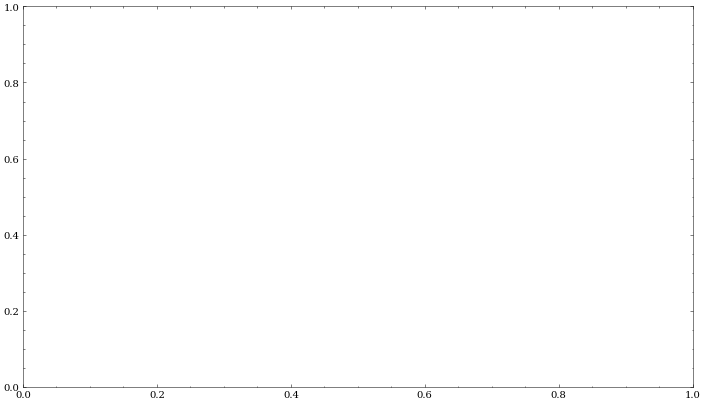

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ndf["Opposition"] = ndf.Party_status=="Opposition"
sns.barplot(y="Speaker_name", x="classified_correct", hue="Opposition", 
data=ndf, ax=ax, dodge=False)

fname = "images/015_analysis_of_classla_parlaspeech_model_missclassifications"


# plt.title("Performance of classla/wav2vec2-large-slavic-parlaspeech-hr")
plt.ylabel("Speaker")
plt.xlabel("Percentage of correctly classified instances")
plt.savefig(fname+".pdf")
plt.savefig(fname+".png")
plt.show()

In [80]:
print(ndf.groupby("Party_status").agg({
    "classified_correct": "mean"
}).to_markdown())

| Party_status   |   classified_correct |
|:---------------|---------------------:|
| Coalition      |             0.671111 |
| Opposition     |             0.582222 |


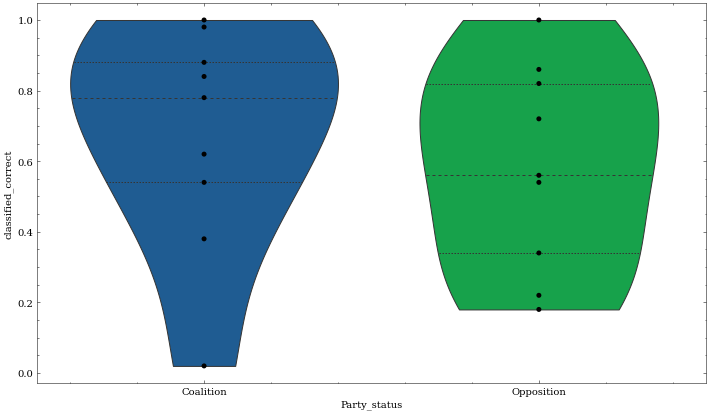

In [122]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.violinplot(
    y="classified_correct",
    x="Party_status",
    # hue="Party_status",
    data=ndf,
    cut=0,
    ax=ax,
    # split=True,
    inner="quartile",
)
sns.swarmplot(y="classified_correct", x="Party_status", data=ndf, ax=ax, color="k")
plt.show()
